## Author-Joel Alex Chandy
## Reg. NO.-220968408
## Dse-b

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Input,SimpleRNN,LSTM,Bidirectional,GRU,Embedding
from tensorflow.keras.models import Sequential
from tensorflow import keras
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

2025-05-12 22:49:50.501141: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-12 22:49:50.827499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-12 22:49:50.957626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-12 22:49:50.995601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-12 22:49:51.242260: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
train_df= pd.read_csv('Train.csv')
train_df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
test_df=pd.read_csv('Test.csv')
test_df

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
4995,This is the kind of picture John Lassiter woul...,1
4996,A MUST SEE! I saw WHIPPED at a press screening...,1
4997,NBC should be ashamed. I wouldn't allow my chi...,0
4998,This movie is a clumsy mishmash of various gho...,0


In [ ]:
valid_df=pd.read_csv('Valid.csv')
valid_df

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tabs')
nltk.download('wordnet')

stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/jac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading punkt_tabs: Package 'punkt_tabs' not found
[nltk_data]     in index
[nltk_data] Downloading package wordnet to /home/jac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_df(text):
    text=re.sub(r'https:\S+|www.\S+|http:\S+',' ',text)
    text=re.sub(r'[^\w\s]',' ',text)
    text=' '.join([word for word in text.split() if word not in stop_words])
    tokens=word_tokenize(text)
    lemmatized_text=[lemmatizer.lemmatize(token,pos='v') for token in tokens]
    return ' '.join(lemmatized_text)

In [7]:
train_df['cleaned_text']=train_df['text'].apply(clean_df)


In [8]:
test_df['cleaned_text']=test_df['text'].apply(clean_df)
valid_df['cleaned_text']=valid_df['text'].apply(clean_df)

In [9]:
train_df['cleaned_text'][2]

'Why people know particular time past like feel need try define time others Replace Woodstock Civil War Apollo moon land Titanic sink get realistic flick formulaic soap opera populate entirely low life trash Is kid young allow go Woodstock fail grade school composition I show old meanies I put movie prove know nuttin topic still make money Yeah already know The one thing watch film give little insight underclass think The next time I see slut bar look like Diane Lane I run way It child abuse let parent worthless raise kid It audience abuse simply stick Woodstock moonlanding flick ipso facto mean film portray 1969'

In [10]:
x_train=train_df['cleaned_text'].values
y_train=train_df['label'].values

x_test=test_df['cleaned_text'].values
y_test=test_df['label'].values

x_valid=valid_df['cleaned_text'].values
y_valid=valid_df[['label']].values

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [12]:
max_features =10000
maxlen=500

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer= Tokenizer(num_words=max_features)


In [14]:
tokenizer.fit_on_texts(x_train)
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)
x_valid_seq=tokenizer.texts_to_sequences(x_valid)


In [15]:
x_train

array(['I grow b 1965 watch love Thunderbirds All mat school watch We play Thunderbirds school lunch school We want Virgil Scott No one want Alan Counting 5 become art form I take children see movie hop would get glimpse I love child How bitterly disappoint The high point snappy theme tune Not could compare original score Thunderbirds Thankfully early Saturday mornings one television channel still play rerun series Gerry Anderson wife create Jonatha Frakes hand directors chair version completely hopeless A waste film Utter rubbish A CGI remake may acceptable replace marionettes Homo sapiens subsp sapiens huge error judgment',
       'When I put movie DVD player sit coke chip I expectations I hop movie would contain strong point first movie Awsome animation good flow story excellent voice cast funny comedy kick ass soundtrack But disappointment find Atlantis Milo Return Had I read review first I might let The follow paragraph direct see first movie enjoy primarily point mention br br Wh

In [16]:
x_train_pad=pad_sequences(x_train_seq,maxlen=maxlen)
x_test_pad=pad_sequences(x_test_seq,maxlen=maxlen)
x_valid_pad=pad_sequences(x_valid_seq,maxlen=maxlen)

In [17]:
print(f'the training data Shape is: {x_train_pad.shape}')

the training data Shape is: (40000, 500)


In [18]:
y_train.shape

(40000,)

In [19]:
x_train_pad.shape

(40000, 500)

In [20]:
lstm=Sequential([
    Embedding(input_dim=max_features,output_dim=128),
    LSTM(128,return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    LSTM(64,return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    LSTM(32),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2), 
    Dense(2,activation='softmax')
])

I0000 00:00:1747070437.203481    2348 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747070437.503046    2348 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747070437.503163    2348 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747070437.507248    2348 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1747070437.507338    2348 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [21]:
lstm.compile(optimizer=keras.optimizers.Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
his=lstm.fit(x_train_pad,y_train,epochs=50,batch_size=128,validation_data=(x_valid_pad,y_valid),callbacks=keras.callbacks.EarlyStopping(patience=3))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9031 - loss: 0.2487 - val_accuracy: 0.8666 - val_loss: 0.3132
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.9217 - loss: 0.2080 - val_accuracy: 0.8794 - val_loss: 0.2934
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9329 - loss: 0.1852 - val_accuracy: 0.8890 - val_loss: 0.2877
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.9440 - loss: 0.1565 - val_accuracy: 0.8804 - val_loss: 0.3087
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9453 - loss: 0.1548 - val_accuracy: 0.8882 - val_loss: 0.3265
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9540 - loss: 0.1342 - val_accuracy: 0.8770 - val_loss: 0.3483


## GRU

In [24]:
gru=Sequential([
    Embedding(input_dim=max_features,output_dim=128),
    GRU(128,return_sequences=True,dropout=0.1),
    GRU(64,return_sequences=True,dropout=0.1),
    GRU(32),
    Dense(2,activation='softmax')
])

In [25]:
gru.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
his_gru=gru.fit(x_train_pad,y_train,epochs=50,batch_size=128,validation_data=(x_valid_pad,y_valid),callbacks=keras.callbacks.EarlyStopping(patience=7))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 85ms/step - accuracy: 0.7254 - loss: 0.5142 - val_accuracy: 0.8774 - val_loss: 0.3080
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9059 - loss: 0.2426 - val_accuracy: 0.8674 - val_loss: 0.3140
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.9326 - loss: 0.1824 - val_accuracy: 0.8936 - val_loss: 0.2773
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9526 - loss: 0.1311 - val_accuracy: 0.8800 - val_loss: 0.3257
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.9661 - loss: 0.0994 - val_accuracy: 0.8858 - val_loss: 0.3645
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9767 - loss: 0.0697 - val_accuracy: 0.8838 - val_loss: 0.3923
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9832 - loss: 0.0495 - val_accuracy: 0.8872 - val_loss: 0.4113
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9887 - loss: 0.0359 - 

## Bi-directional rnn with 5 Layers

In [27]:
birnn=Sequential([
    Embedding(input_dim=max_features,output_dim=128),
    Bidirectional(SimpleRNN(128,return_sequences=True,dropout=0.5)),
    keras.layers.BatchNormalization(),
    Bidirectional(SimpleRNN(128,return_sequences=True,dropout=0.2)),
    #keras.layers.BatchNormalization(),
    Bidirectional(SimpleRNN(64,return_sequences=True,dropout=0.2)),
    keras.layers.BatchNormalization(),
    Bidirectional(SimpleRNN(32,return_sequences=True,dropout=0.1)),
    keras.layers.BatchNormalization(),
    Bidirectional(SimpleRNN(16,return_sequences=False,dropout=0.1)),
    Dense(2,activation='softmax')
])


In [ ]:
birnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
his_birnn=birnn.fit(x_train_pad,y_train,epochs=50,batch_size=128,validation_data=(x_valid_pad,y_valid),callbacks=keras.callbacks.EarlyStopping(patience=7))

Epoch 1/50


I0000 00:00:1747072702.477864    2888 service.cc:146] XLA service 0x7f3ea5190070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747072702.478076    2888 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-05-12 23:28:22.699448: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-12 23:28:26.495185: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_329', 8 bytes spill stores, 8 bytes spill loads

2025-05-12 23:28:32.563382: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_16', 8 bytes spill stores, 24 bytes spill loads

I0000 00:00:1747072712.663342  

312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.5037 - loss: 0.7435

2025-05-12 23:31:35.228933: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_16', 8 bytes spill stores, 24 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 213s 628ms/step - accuracy: 0.5037 - loss: 0.7432 - val_accuracy: 0.4972 - val_loss: 0.6932
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 184s 588ms/step - accuracy: 0.4987 - loss: 0.6946 - val_accuracy: 0.4972 - val_loss: 0.6953
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 188s 602ms/step - accuracy: 0.5005 - loss: 0.6941 - val_accuracy: 0.5028 - val_loss: 0.6935
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 624ms/step - accuracy: 0.5051 - loss: 0.6936 - val_accuracy: 0.4972 - val_loss: 0.6935
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 618ms/step - accuracy: 0.5032 - loss: 0.6938 - val_accuracy: 0.5028 - val_loss: 0.6932
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 613ms/step - accuracy: 0.4987 - loss: 0.6938 - val_accuracy: 0.4972 - val_loss: 0.6935
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 220s 702ms/step - accuracy: 0.5016 - loss: 0.6937 - val_accuracy: 0.5028 - val_loss: 0.6931
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 229s 731ms/step - accuracy: 0.5007 - loss: 0.69

In [31]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
birnn.output_shape

(None, 2)

In [33]:
labels=test_df['label'].values
labels

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
prediction_gru=gru.predict(x_test_pad,batch_size=128)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [35]:
prediction_gru=np.argmax(prediction_gru,axis=1)

In [36]:
prediction_gru
corr_pred=sum([prediction_gru[i]==labels[i] for i in range(len(labels))])
gru_accuracy=corr_pred/len(labels)

In [37]:
gru_accuracy

0.8774

In [38]:
prediction_birnn=birnn.predict(x_test_pad,batch_size=128)


40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 366ms/step


In [39]:
prediction_birnn=np.argmax(prediction_birnn,axis=1)
count_birnn=sum([prediction_birnn[i]==labels[i] for i in range(len(labels))])
birnn_accuracy=count_birnn/len(labels)
print('The accuracy of the bi directional rnn is:',birnn_accuracy)

The accuracy of the bi directional rnn is: 0.499


In [40]:
prediction_lstm=lstm.predict(x_test_pad,batch_size=128)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [41]:
prediction_lstm=np.argmax(prediction_lstm,axis=1)
count_lstm=sum([prediction_lstm[i]==labels[i] for i in range(len(labels))])
lstm_accuracy=count_lstm/len(labels)
print('The accuracy of the bi directional rnn is:',lstm_accuracy)

The accuracy of the bi directional rnn is: 0.8714


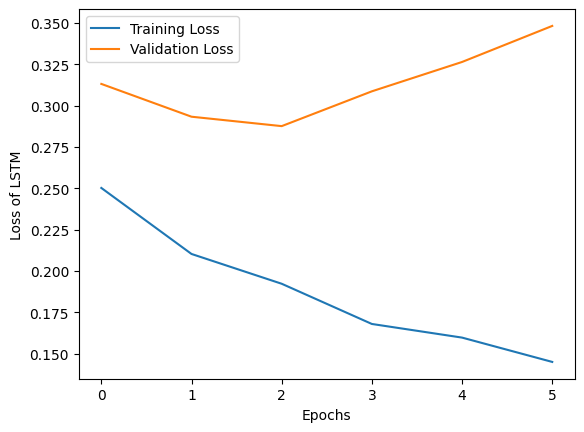

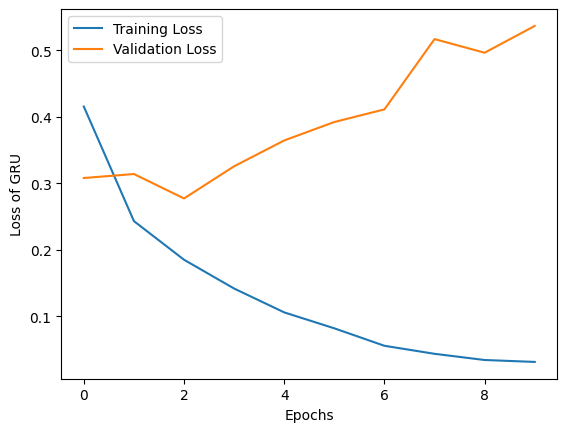

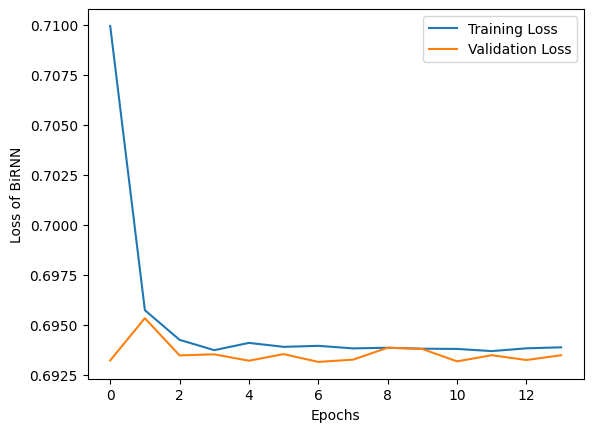

In [42]:
plt.plot(his.history['loss'],label='Training Loss')
plt.plot(his.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss of LSTM')
plt.legend()
plt.show()

plt.plot(his_gru.history['loss'],label='Training Loss')
plt.plot(his_gru.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss of GRU')
plt.legend()
plt.show()

plt.plot(his_birnn.history['loss'],label='Training Loss')
plt.plot(his_birnn.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss of BiRNN')
plt.legend()
plt.show()

In [45]:
rslt=[]

rslt.append([
    'LSTM Model',
    np.array(np.mean(his.history['loss'])),
    np.array(np.mean(his.history['val_loss'])),
    np.array(np.mean(his.history['accuracy'])),
    np.array(np.mean(his.history['val_accuracy'])),
    np.array(lstm_accuracy)
])

rslt.append([
    'GRU Model',
    np.array(np.mean(his_gru.history['loss'])),
    np.array(np.mean(his_gru.history['val_loss'])),
    np.array(np.mean(his_gru.history['accuracy'])),
    np.array(np.mean(his_gru.history['val_accuracy'])),
    np.array(gru_accuracy)
])

rslt.append([
    'BIdirectioaalRNN Model',
    np.array(np.mean(his_birnn.history['loss'])),
    np.array(np.mean(his_birnn.history['val_loss'])),
    np.array(np.mean(his_birnn.history['accuracy'])),
    np.array(np.mean(his_birnn.history['val_accuracy'])),
    np.array(birnn_accuracy)
])

columns=['model','Mean Training Loss','Mean Validation Loss','Mean Training Accuracy','Mean Validation Accuracy','Accuracy ']
rslt_df=pd.DataFrame(rslt,columns=columns)

In [44]:
rslt_df

,model,Mean Training Loss,Mean Validation Loss,Mean Training Accuract,Mean Validation Accuracy,Accuracy
0,LSTM Model,0.1875918929775556,0.3129628201325734,0.9304958283901215,0.8800999919573466,0.8714
1,GRU Model,0.13373480141162872,0.3943473368883133,0.9468975007534027,0.8814199984073638,0.8774
2,BIdirectioaalRNN Model,0.6951487064361572,0.6935365668364933,0.49937321671417784,0.4992000034877232,0.499


## GRU & LSTM  both show promising accuracy of 87%

## Observation
### The training loss is gradually seen decreasing and stabalizing over the epochs,but the validation loss is increasing.
### From the data and graph,its clear pattern of overfitting.
### And both the models show high variance.